## Barcelona Air Quality Analysis: January 2025

In [23]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Load data (january 2025)
data = pd.read_csv("\data\2025_01_Gener_qualitat_aire_BCN.csv")
# Visualize the first 5 rows of the DataFrame
data.head()

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2025,1,1,13.0,...,22.0,V,62.0,V,20.0,V,12.0,V,6.0,V
1,8,Barcelona,19,Barcelona,4,7,2025,1,2,NaN,...,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N
2,8,Barcelona,19,Barcelona,4,7,2025,1,3,NaN,...,2.0,V,2.0,V,3.0,V,4.0,V,2.0,V
3,8,Barcelona,19,Barcelona,4,7,2025,1,4,2.0,...,49.0,V,46.0,V,64.0,V,34.0,V,14.0,V
4,8,Barcelona,19,Barcelona,4,7,2025,1,5,14.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [6]:
print(f"The dataset contains {data.shape}")
print(f"\n DATASET INFORMATION")
data.info()
print(f"\n NUMBER OF DISTINCT ELEMENTS")
data.nunique()

The dataset contains (2170, 57)

 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODI_PROVINCIA    2170 non-null   int64  
 1   PROVINCIA         2170 non-null   object 
 2   CODI_MUNICIPI     2170 non-null   int64  
 3   MUNICIPI          2170 non-null   object 
 4   ESTACIO           2170 non-null   int64  
 5   CODI_CONTAMINANT  2170 non-null   int64  
 6   ANY               2170 non-null   int64  
 7   MES               2170 non-null   int64  
 8   DIA               2170 non-null   int64  
 9   H01               2065 non-null   float64
 10  V01               2170 non-null   object 
 11  H02               2115 non-null   float64
 12  V02               2170 non-null   object 
 13  H03               2115 non-null   float64
 14  V03               2170 non-null   object 
 15  H04               2115 non-null   f

CODI_PROVINCIA        1
PROVINCIA             1
CODI_MUNICIPI         1
MUNICIPI              1
ESTACIO               8
CODI_CONTAMINANT     25
ANY                   1
MES                   1
DIA                  31
H01                 548
V01                   2
H02                 553
V02                   2
H03                 526
V03                   2
H04                 542
V04                   2
H05                 551
V05                   2
H06                 546
V06                   2
H07                 549
V07                   2
H08                 579
V08                   2
H09                 607
V09                   2
H10                 603
V10                   2
H11                 583
V11                   2
H12                 575
V12                   2
H13                 563
V13                   2
H14                 570
V14                   2
H15                 551
V15                   2
H16                 550
V16                   2
H17             

In [7]:
data.shape

(2170, 57)

### 1. Data Cleaning and Validation
The dataset includes hourly measurements ($H01$ to $H24$) and corresponding validation flags ($V01$ to $V24$). 
* **V (Valid):** The measurement is reliable.
* **N (Invalid):** The sensor may have malfunctioned or is undergoing maintenance.

**Target Pollutants:**
* **9:** PM2.5
* **14:** Ozone (O3)

In [8]:
# Remove columns we do not need, easier for time-series analysis
data = data.drop(["CODI_PROVINCIA","PROVINCIA","CODI_MUNICIPI","MUNICIPI", "ANY", "MES"],axis=1)
data.rename(columns={'ESTACIO':'STATION','CODI_CONTAMINANT':'POLLUTANT','DIA':'DAY'}, inplace=True)

# Keep only rows where POLLUTANT is 9 and 14
data = data[data['POLLUTANT'].isin([9, 14])]

# Replace 9 → "PM2.5" and 14 → "O3" in the same DataFrame
data.loc[data['POLLUTANT'] == 9, 'POLLUTANT'] = "PM2.5"
data.loc[data['POLLUTANT'] == 14, 'POLLUTANT'] = "O3"

data.head()

C:\Users\camil\AppData\Local\Temp\ipykernel_6968\2212188624.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'PM2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['POLLUTANT'] == 9, 'POLLUTANT'] = "PM2.5"


,STATION,POLLUTANT,DAY,H01,V01,H02,V02,H03,V03,H04,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
341,43,PM2.5,1,41.0,V,33.0,V,30.0,V,30.0,...,17.0,V,19.0,V,15.0,V,15.0,V,14.0,V
342,43,PM2.5,2,10.0,V,10.0,V,6.0,V,5.0,...,7.0,V,7.0,V,7.0,V,9.0,V,8.0,V
343,43,PM2.5,3,8.0,V,8.0,V,7.0,V,7.0,...,10.0,V,11.0,V,11.0,V,12.0,V,12.0,V
344,43,PM2.5,4,11.0,V,10.0,V,9.0,V,9.0,...,18.0,V,16.0,V,15.0,V,22.0,V,25.0,V
345,43,PM2.5,5,20.0,V,20.0,V,19.0,V,17.0,...,9.0,V,13.0,V,12.0,V,17.0,V,19.0,V


In [9]:
data.shape

(279, 51)



---





In [ ]:
# Load stations metadata
data_stations = pd.read_csv("\data\2025_qualitat_aire_estacions.csv")
# Visualize the first few rows of the DataFrame
data_stations.head()

,Estacio,nom_cabina,codi_dtes,zqa,codi_eoi,Longitud,Latitud,ubicacio,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Clas_1,Clas_2,Codi_Contaminant
0,4,Barcelona - Poblenou,I2,1,8019004,2.2045,41.4039,Plaça Josep Trueta (Pujades - Lope de Vega),10,Sant Marti,68,el Poblenou,Urbana,Fons,8
1,4,Barcelona - Poblenou,I2,1,8019004,2.2045,41.4039,Plaça Josep Trueta (Pujades - Lope de Vega),10,Sant Marti,68,el Poblenou,Urbana,Fons,10
2,4,Barcelona - Poblenou,I2,1,8019004,2.2045,41.4039,Plaça Josep Trueta (Pujades - Lope de Vega),10,Sant Marti,68,el Poblenou,Urbana,Fons,7
3,4,Barcelona - Poblenou,I2,1,8019004,2.2045,41.4039,Plaça Josep Trueta (Pujades - Lope de Vega),10,Sant Marti,68,el Poblenou,Urbana,Fons,12
4,42,Barcelona - Sants,ID,1,8019042,2.1331,41.3788,Jardins de Can Mantega (Joan Güell - Violant d...,3,Sants-Montjuic,18,Sants,Urbana,Fons,8


In [14]:
# Keep only the code of the station and the name of the neighbourhood

data_stations_filtered = data_stations[["Estacio", "Nom_barri"]]
data_stations_filtered = data_stations[["Estacio", "Nom_barri"]].drop_duplicates()
data_stations_filtered.head()

,Estacio,Nom_barri
0,4,el Poblenou
4,42,Sants
7,43,la Nova Esquerra de l'Eixample
15,44,la Vila de Gracia
22,50,"Sant Pere, Santa Caterina i la Ribera"


In [15]:
station_dict = data_stations_filtered.set_index('Estacio')['Nom_barri'].to_dict()
station_dict

{4: 'el Poblenou',
 42: 'Sants',
 43: "la Nova Esquerra de l'Eixample",
 44: 'la Vila de Gracia',
 50: 'Sant Pere, Santa Caterina i la Ribera',
 54: "la Vall d'Hebron",
 57: 'Pedralbes',
 58: 'Vallvidrera-el Tibidabo-les Planes'}

In [16]:
# Match the neighbourhood with the station code

data['Nom_barri'] = data['STATION'].map(station_dict)
data.rename(columns={"Nom_barri":"NEIGHBOURHOOD"}, inplace = True)
data.head()

,STATION,POLLUTANT,DAY,H01,V01,H02,V02,H03,V03,H04,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,NEIGHBOURHOOD
341,43,PM2.5,1,41.0,V,33.0,V,30.0,V,30.0,...,V,19.0,V,15.0,V,15.0,V,14.0,V,la Nova Esquerra de l'Eixample
342,43,PM2.5,2,10.0,V,10.0,V,6.0,V,5.0,...,V,7.0,V,7.0,V,9.0,V,8.0,V,la Nova Esquerra de l'Eixample
343,43,PM2.5,3,8.0,V,8.0,V,7.0,V,7.0,...,V,11.0,V,11.0,V,12.0,V,12.0,V,la Nova Esquerra de l'Eixample
344,43,PM2.5,4,11.0,V,10.0,V,9.0,V,9.0,...,V,16.0,V,15.0,V,22.0,V,25.0,V,la Nova Esquerra de l'Eixample
345,43,PM2.5,5,20.0,V,20.0,V,19.0,V,17.0,...,V,13.0,V,12.0,V,17.0,V,19.0,V,la Nova Esquerra de l'Eixample


In [17]:
# Check for NaN values
data_nan = data[data.isnull().any(axis=1)]

# This returns the full rows so you can see the STATION and DAY for the missing data
display(data_nan)

,STATION,POLLUTANT,DAY,H01,V01,H02,V02,H03,V03,H04,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,NEIGHBOURHOOD
404,43,O3,2,43.0,V,45.0,V,60.0,V,68.0,...,V,43.0,V,45.0,V,31.0,V,32.0,V,la Nova Esquerra de l'Eixample
422,43,O3,20,23.0,V,60.0,V,48.0,V,5.0,...,V,4.0,V,6.0,V,9.0,V,29.0,V,la Nova Esquerra de l'Eixample
781,44,O3,7,54.0,V,53.0,V,52.0,V,45.0,...,V,34.0,V,44.0,V,53.0,V,58.0,V,la Vila de Gracia
794,44,O3,20,64.0,V,66.0,V,64.0,V,62.0,...,V,9.0,V,26.0,V,24.0,V,43.0,V,la Vila de Gracia
901,50,O3,3,33.0,V,27.0,V,28.0,V,32.0,...,V,17.0,V,36.0,V,30.0,V,42.0,V,"Sant Pere, Santa Caterina i la Ribera"
915,50,O3,17,68.0,V,64.0,V,59.0,V,60.0,...,V,17.0,V,2.0,V,2.0,V,8.0,V,"Sant Pere, Santa Caterina i la Ribera"
1187,54,O3,10,42.0,V,45.0,V,39.0,V,36.0,...,V,56.0,V,57.0,V,48.0,V,53.0,V,la Vall d'Hebron
1191,54,O3,14,10.0,V,9.0,V,17.0,V,24.0,...,V,2.0,V,5.0,V,12.0,V,2.0,V,la Vall d'Hebron
1551,57,PM2.5,2,8.0,V,7.0,V,5.0,V,3.0,...,V,6.0,V,6.0,V,6.0,V,6.0,V,Pedralbes
1675,57,O3,2,47.0,V,49.0,V,57.0,V,73.0,...,V,62.0,V,60.0,V,56.0,V,55.0,V,Pedralbes



## 2. Air Quality Safety Standards

We evaluate the data based on the following safety thresholds:

| Pollutant | Safe Limit | Measurement Basis |
| :--- | :--- | :--- |
| **PM2.5** | $15 \mu g/m^3$ | 24-hour mean |
| **Ozone (O3)** | $100 \mu g/m^3$ | Maximum daily 8-hour mean |

### Analysis Intervals
To understand daily patterns (e.g., traffic peaks or photochemical reactions), we divide the day into the following intervals:

* **00:00 - 06:00:** Night/Early Morning
* **06:00 - 10:00:** Morning Rush Hour
* **10:00 - 14:00:** Midday
* **14:00 - 19:00:** Afternoon Peak (Expected high for **Ozone**)
* **19:00 - 00:00:** Evening

> **Note on Ozone:** O3 is a photochemical pollutant created by the reaction of sunlight with other pollutants. Therefore, we expect to see concentrations rise significantly during the sunniest parts of the day.













PM2.5 Levels by Neighborhood and Time Period

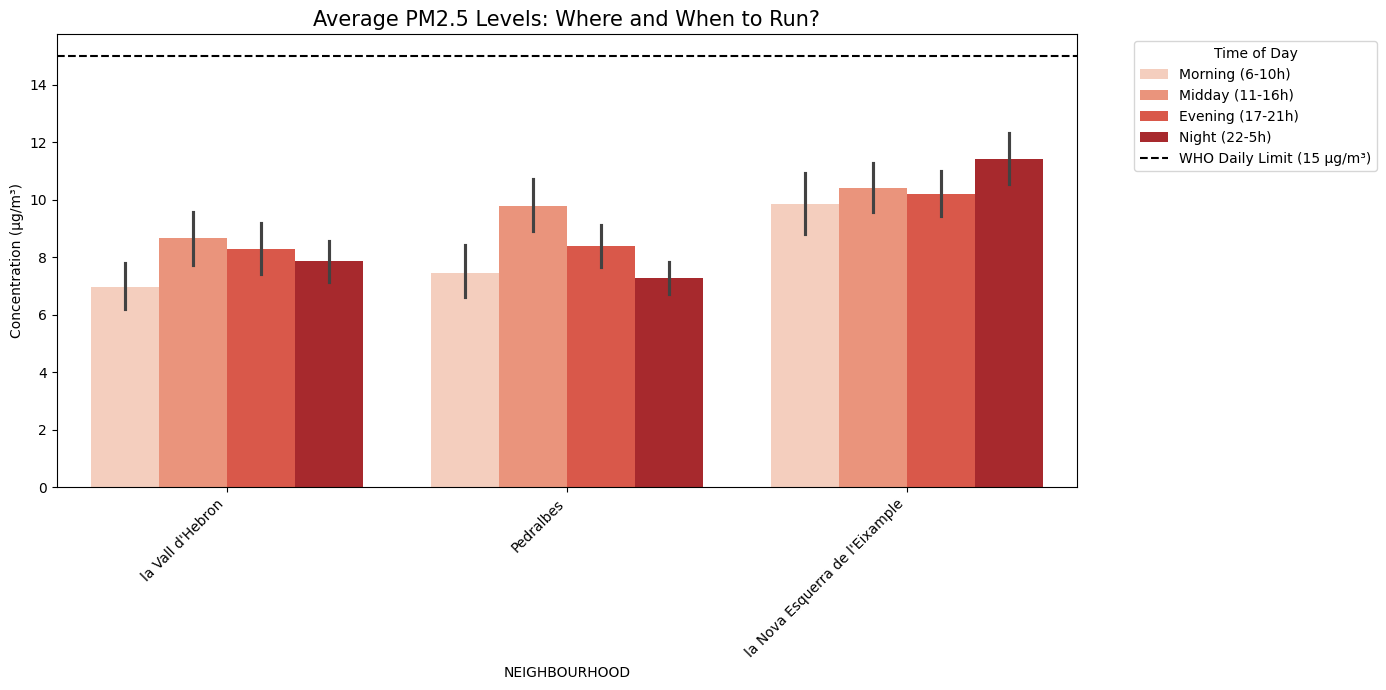

In [27]:
# 1. Prepare the data for plotting
hour_cols = [f'H{i:02d}' for i in range(1, 25)]
data_long = data.melt(
    id_vars=['STATION', 'POLLUTANT', 'DAY', 'NEIGHBOURHOOD'], 
    value_vars=hour_cols, 
    var_name='HOUR', 
    value_name='CONCENTRATION'
)

# Convert HOUR to integer and create 'Time Periods' for runners
data_long['HOUR_INT'] = data_long['HOUR'].str.replace('H', '').astype(int)

def categorize_time(hour):
    if 6 <= hour <= 10: return 'Morning (6-10h)'
    elif 11 <= hour <= 16: return 'Midday (11-16h)'
    elif 17 <= hour <= 21: return 'Evening (17-21h)'
    else: return 'Night (22-5h)'

data_long['TIME_PERIOD'] = data_long['HOUR_INT'].apply(categorize_time)

# --- PLOT 1: PM2.5 ---
plt.figure(figsize=(14, 7))
pm25_data = data_long[data_long['POLLUTANT'] == 'PM2.5']

# Sort neighborhoods by mean concentration for a cleaner look
order = pm25_data.groupby('NEIGHBOURHOOD')['CONCENTRATION'].mean().sort_values().index

sns.barplot(
    data=pm25_data, 
    x='NEIGHBOURHOOD', 
    y='CONCENTRATION', 
    hue='TIME_PERIOD', 
    hue_order=['Morning (6-10h)', 'Midday (11-16h)', 'Evening (17-21h)', 'Night (22-5h)'],
    order=order,
    palette='Reds'
)

plt.xticks(rotation=45, ha='right')
plt.title('Average PM2.5 Levels: Where and When to Run?', fontsize=15)
plt.ylabel('Concentration (µg/m³)')
plt.axhline(15, color='black', linestyle='--', label='WHO Daily Limit (15 µg/m³)')
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



---



O₃ (Ozone) Levels by Neighborhood and Time Period

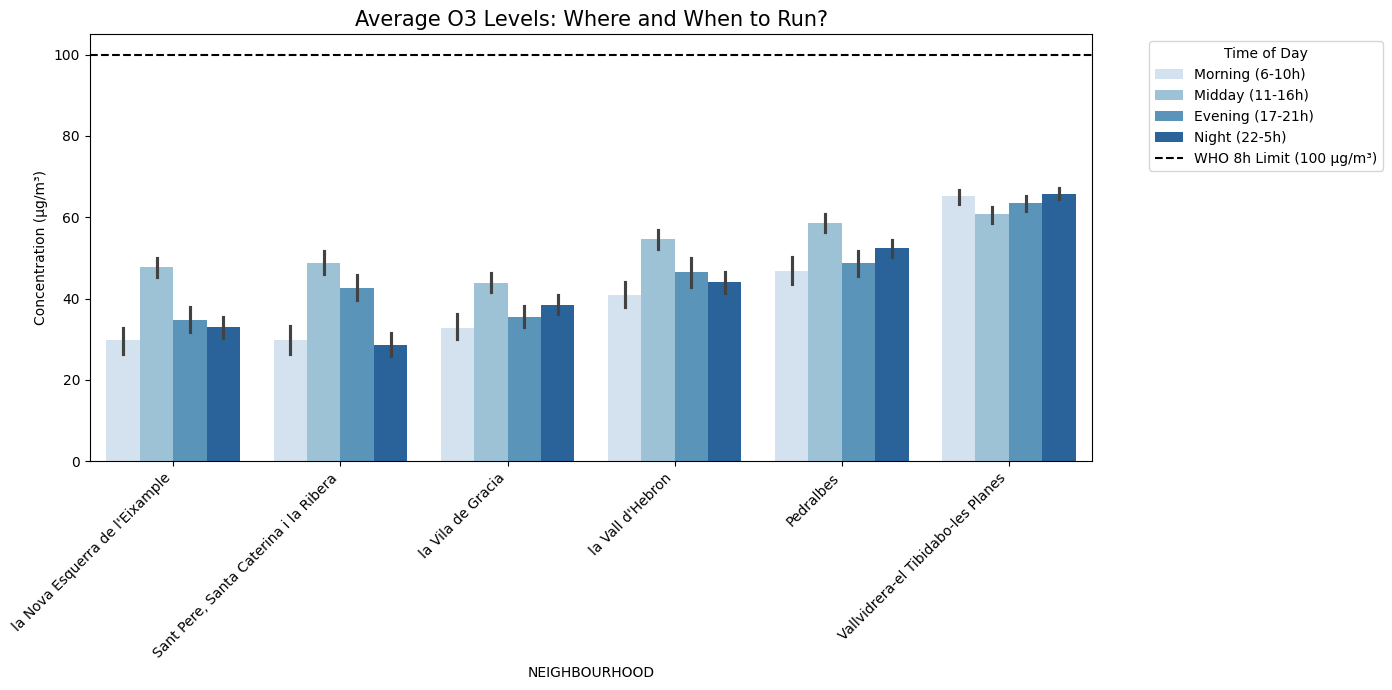

In [28]:
# --- PLOT 2: O3 (Ozone) ---
plt.figure(figsize=(14, 7))
o3_data = data_long[data_long['POLLUTANT'] == 'O3']

# Sort neighborhoods by mean O3 concentration
order_o3 = o3_data.groupby('NEIGHBOURHOOD')['CONCENTRATION'].mean().sort_values().index

sns.barplot(
    data=o3_data, 
    x='NEIGHBOURHOOD', 
    y='CONCENTRATION', 
    hue='TIME_PERIOD', 
    hue_order=['Morning (6-10h)', 'Midday (11-16h)', 'Evening (17-21h)', 'Night (22-5h)'],
    order=order_o3,
    palette='Blues'
)

plt.xticks(rotation=45, ha='right')
plt.title('Average O3 Levels: Where and When to Run?', fontsize=15)
plt.ylabel('Concentration (µg/m³)')
plt.axhline(100, color='black', linestyle='--', label='WHO 8h Limit (100 µg/m³)')
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()